In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [7]:
df = pd.read_csv('E:\\Notes\\Statistics\\Feature Engineering\\Datasets\\placement.csv')
print(df.sample(5))
print(df.shape)

     cgpa  placement_exam_marks  placed
340  7.45                  51.0       0
565  6.61                  54.0       1
297  7.03                  32.0       1
266  7.73                  50.0       1
617  7.08                  22.0       0
(1000, 3)


Text(0.5, 1.0, 'Distribution of Marks')

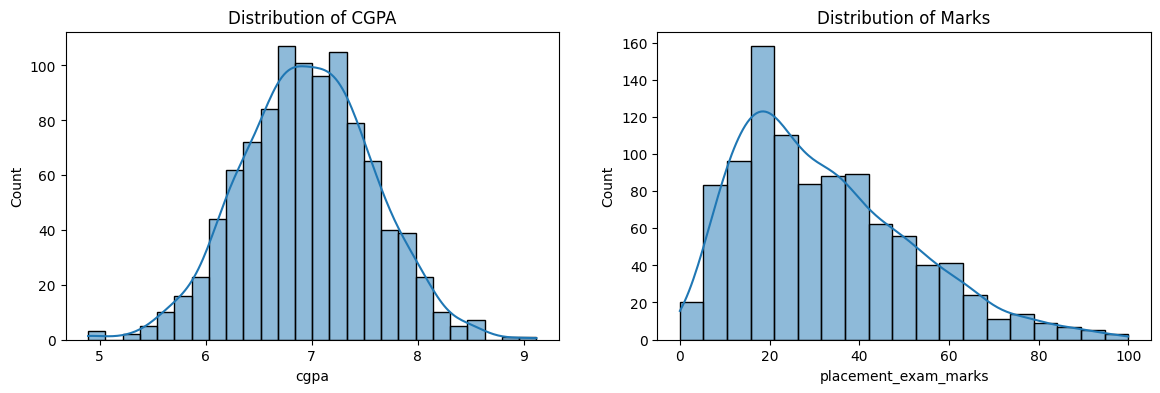

In [8]:
# Understanding Data Distribution of CGPA and placement_exam_marks 
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['cgpa'], kde=True)
plt.title("Distribution of CGPA")

plt.subplot(122)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title("Distribution of Marks")

**We cannot apply Z-Score Normalization in Marks column as the data is left skewed**

In [9]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [11]:
# Defining Boundary 
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()

print(lower_limit , upper_limit)

5.113546374602832 8.808933625397168


In [12]:
# Finding Outliers -
df[(df['cgpa'] > 8.808) | (df['cgpa'] < 5.113)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


**There are 5 Outliers present**

#### **Handling Outliers (Z-Score)**

1) **Trimming**

In [ ]:
# Method 1-
new_df = df[(df['cgpa'] < 8.808) & (df['cgpa'] > 5.113)]
new_df.sample(5)

,cgpa,placement_exam_marks,placed
416,7.51,55.0,1
430,7.22,19.0,1
44,7.88,55.0,0
567,6.18,36.0,1
11,6.38,7.0,1


In [20]:
# Method 2- 
df['cgpa_Zscore'] = stats.zscore(df['cgpa'])
df.head(5)

,cgpa,placement_exam_marks,placed,cgpa_Zscore
0,7.19,26.0,1,0.371611
1,7.46,38.0,1,0.810215
2,7.54,40.0,1,0.940171
3,6.42,8.0,1,-0.879222
4,7.23,17.0,0,0.436589


In [21]:
new_df1 = df[(df['cgpa_Zscore'] <3) & (df['cgpa_Zscore'] > -3)]
new_df1

,cgpa,placement_exam_marks,placed,cgpa_Zscore
0,7.19,26.0,1,0.371611
1,7.46,38.0,1,0.810215
2,7.54,40.0,1,0.940171
3,6.42,8.0,1,-0.879222
4,7.23,17.0,0,0.436589
...,...,...,...,...
991,7.04,57.0,0,0.127942
992,6.26,12.0,0,-1.139135
993,6.73,21.0,1,-0.375640
994,6.48,63.0,0,-0.781754


2) **Capping**

In [22]:
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()

print(lower_limit, upper_limit)

5.113546374602832 8.808933625397168


In [23]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,
    upper_limit,
    np.where(df['cgpa'] < lower_limit,
             lower_limit,
             df['cgpa'])
)

In [ ]:
df.shape # As we can see no rows removed

(1000, 4)

##### **Handling Outlier (IQR Method)**

Text(0.5, 1.0, 'Distribution of Marks')

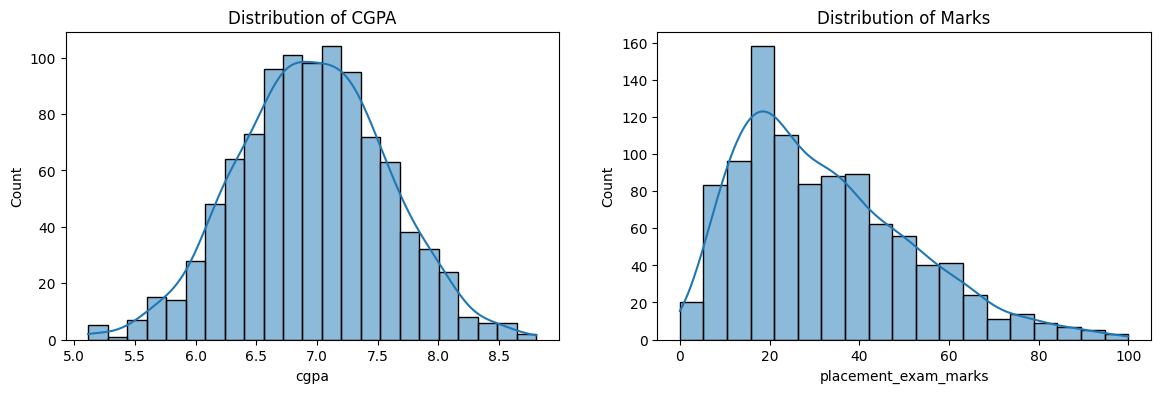

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['cgpa'], kde=True)
plt.title("Distribution of CGPA")

plt.subplot(122)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title("Distribution of Marks")

**Applying IQR method on placement_exam_marks as the data is skewed**

In [28]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_Zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.465494e-16
std,0.612688,19.130822,0.500129,1.000500e+00
min,5.113546,0.000000,0.000000,-3.364643e+00
25%,6.550000,17.000000,0.000000,-6.680422e-01
50%,6.960000,28.000000,0.000000,-2.014328e-03
75%,7.370000,44.000000,1.000000,6.640135e-01
max,8.808934,100.000000,1.000000,3.506815e+00


In [31]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

print(percentile25, percentile75)

17.0 44.0


In [32]:
iqr = percentile75 - percentile25
iqr

np.float64(27.0)

In [37]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

print(upper_limit, lower_limit)

84.5 -23.5


In [47]:
# Outliers
df[(df['placement_exam_marks'] < lower_limit) | (df['placement_exam_marks'] > upper_limit)]

,cgpa,placement_exam_marks,placed,cgpa_Zscore
9,7.75,94.0,1,1.281308
40,6.60,86.0,1,-0.586819
61,7.51,86.0,0,0.891438
134,6.33,93.0,0,-1.025423
162,7.80,90.0,0,1.362531
283,7.09,87.0,0,0.209165
290,8.38,87.0,0,2.304716
311,6.97,87.0,1,0.014230
324,6.64,90.0,0,-0.521841
630,6.56,96.0,1,-0.651798


1) **Trimming**

In [38]:
new_df2 = df[(df['placement_exam_marks'] > lower_limit) & (df['placement_exam_marks'] < upper_limit)]
new_df2

,cgpa,placement_exam_marks,placed,cgpa_Zscore
0,7.190000,26.0,1,0.371611
1,7.460000,38.0,1,0.810215
2,7.540000,40.0,1,0.940171
3,6.420000,8.0,1,-0.879222
4,7.230000,17.0,0,0.436589
...,...,...,...,...
995,8.808934,44.0,1,3.100701
996,8.808934,65.0,1,3.506815
997,5.113546,34.0,0,-3.364643
998,8.620000,46.0,1,2.694586


In [40]:
new_df2.shape

(985, 4)

<Axes: ylabel='placement_exam_marks'>

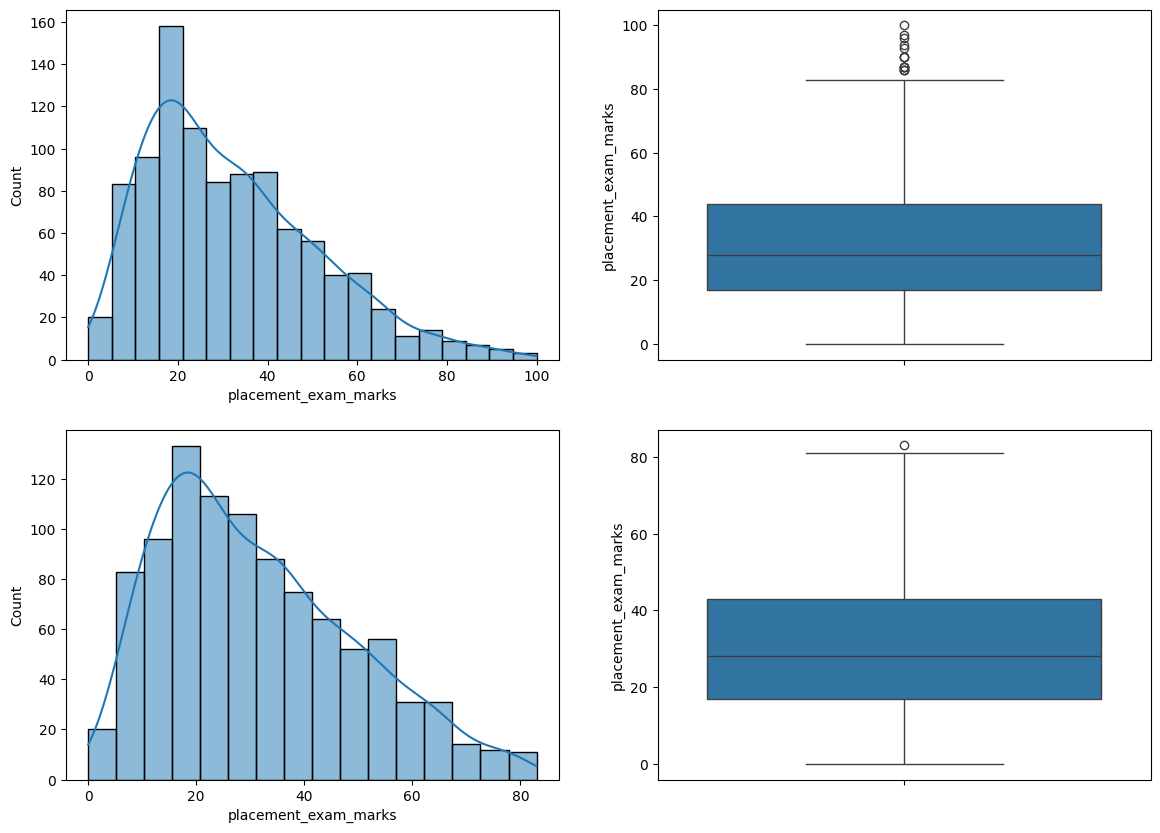

In [44]:
# Plot 
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df2['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df2['placement_exam_marks'])

2) **Capping**

In [48]:
new_df3 = df.copy()

new_df3['placement_exam_marks'] = np.where(
    new_df3['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(new_df3['placement_exam_marks'] < lower_limit,
             lower_limit,
             new_df3['placement_exam_marks'])
)

In [49]:
new_df3

,cgpa,placement_exam_marks,placed,cgpa_Zscore
0,7.190000,26.0,1,0.371611
1,7.460000,38.0,1,0.810215
2,7.540000,40.0,1,0.940171
3,6.420000,8.0,1,-0.879222
4,7.230000,17.0,0,0.436589
...,...,...,...,...
995,8.808934,44.0,1,3.100701
996,8.808934,65.0,1,3.506815
997,5.113546,34.0,0,-3.364643
998,8.620000,46.0,1,2.694586


<Axes: ylabel='placement_exam_marks'>

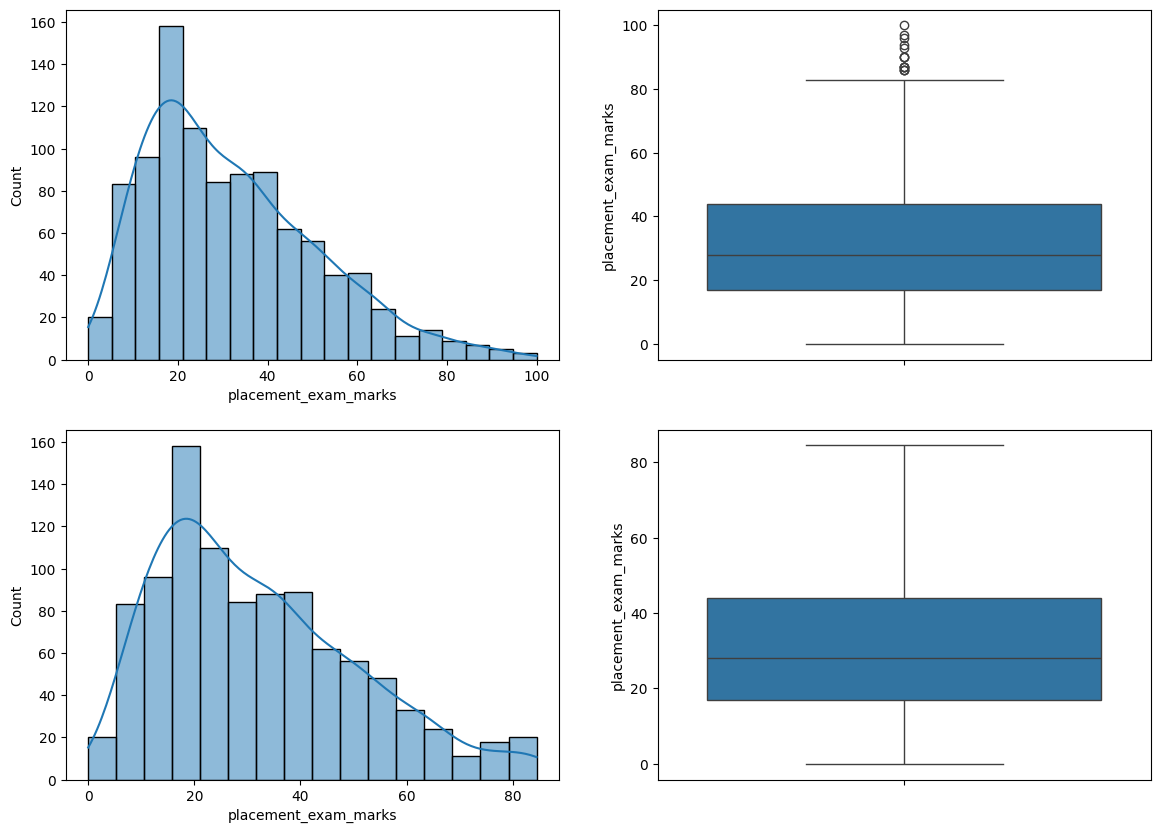

In [51]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df3['placement_exam_marks'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df3['placement_exam_marks'])

##### **Handling Outlier(Percentile Method)**

In [52]:
data = pd.read_csv('E:\\Notes\\Statistics\\Feature Engineering\\Datasets\\weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [53]:
data.shape

(10000, 3)

<Axes: ylabel='Weight'>

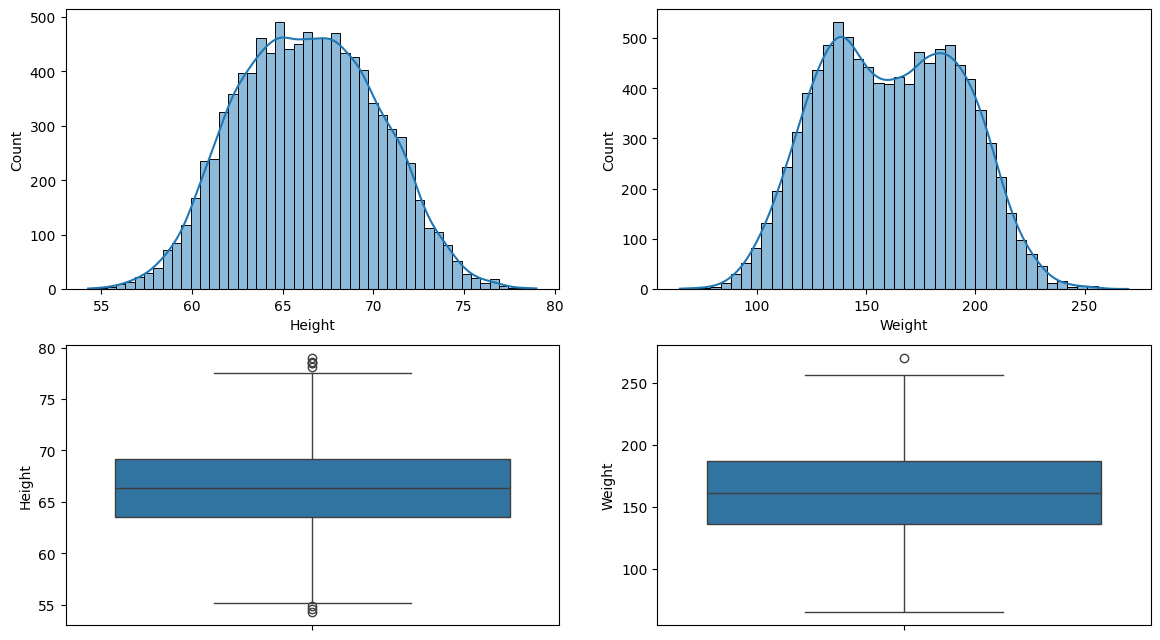

In [68]:
# Understanding Data Distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.histplot(data['Height'],kde=True)

plt.subplot(222)
sns.histplot(data['Weight'],kde=True)

plt.subplot(223)
sns.boxplot(data['Height'])

plt.subplot(224)
sns.boxplot(data['Weight'])

In [56]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


**Applying Percentile Method on Weight Column**

In [57]:
lower_limit = data['Weight'].quantile(0.01)  # 1 percentile
upper_limit = data['Weight'].quantile(0.99)  # 99 Percentile

print(lower_limit,upper_limit)

97.03287365980914 227.43736983602577


In [59]:
# Outliers
data[(data['Weight'] <= lower_limit) | (data['Weight'] >= upper_limit)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
23,Male,75.205974,228.761781
82,Male,73.826127,237.916736
190,Male,76.709835,235.035419
191,Male,72.571121,230.560535
...,...,...,...
9761,Female,56.975279,90.341784
9775,Female,60.025950,87.035416
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957


**There are 200 outliers present**

1) **Trimming**

In [58]:
data1 = data[(data['Weight'] >= lower_limit) & (data['Weight'] <= upper_limit)]
data1

,Gender,Height,Weight
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


2) **Capping (Winsorization)**

In [61]:
new_data = data.copy()

new_data['Weight'] = np.where(data['Weight'] >= upper_limit,
                              upper_limit,
                              np.where(data['Weight'] <= lower_limit,
                                       lower_limit,
                                       data['Weight']))

In [63]:
new_data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.422569
std,3.847528,31.769578
min,54.263133,97.032874
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,227.437370


In [64]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<Axes: ylabel='Weight'>

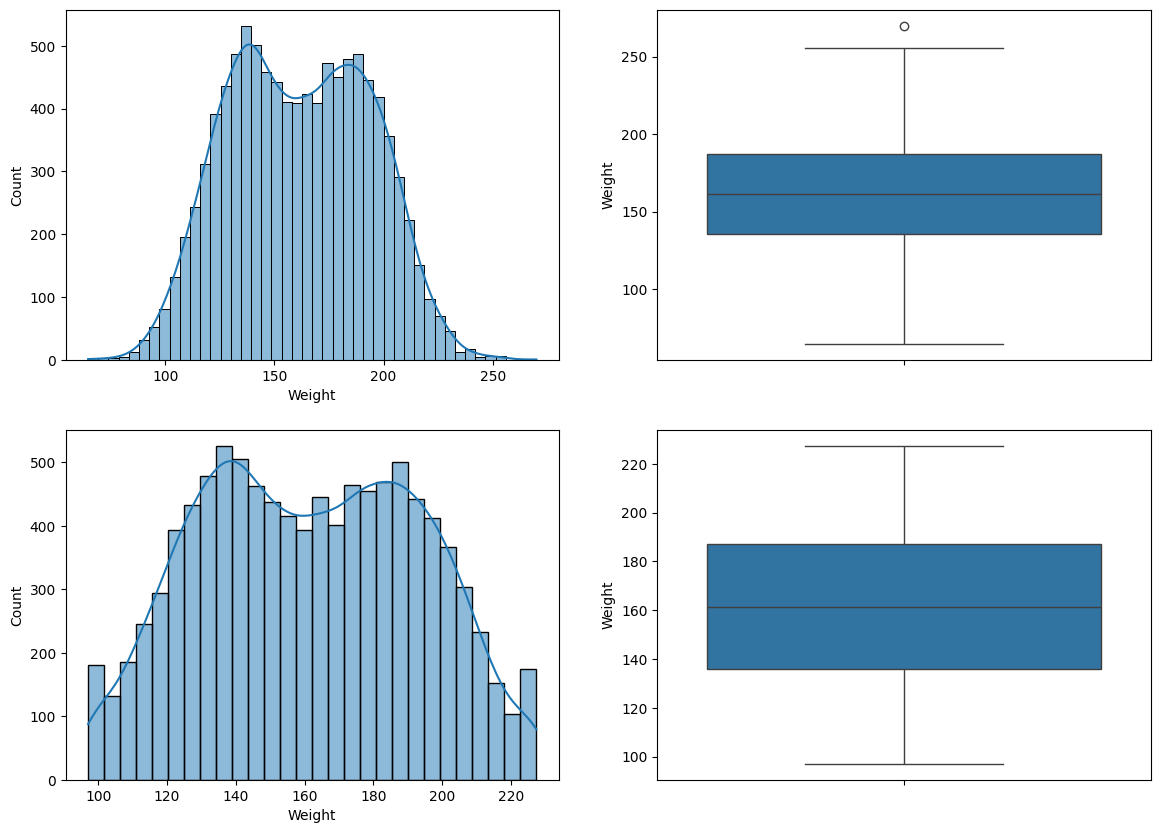

In [65]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.histplot(data['Weight'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data['Weight'])

plt.subplot(2,2,3)
sns.histplot(new_data['Weight'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_data['Weight'])